In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\4-gauss\4-gauss_C_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.067351,3.53370,0.469590,0.67908,3.43440,2.79240,2.77630,1.69910,3.815600,1.74640
1,-0.098505,-0.17857,2.062800,NaN,0.424720,1.17850,1.68020,1.38880,3.21670,2.92360,0.772910,0.64145
2,-0.169460,0.50153,2.470900,3.06500,1.567600,1.48240,0.92160,2.64240,1.51870,2.53180,2.432800,NaN
3,-0.136050,0.47279,0.588090,1.95630,2.787000,2.59570,2.89330,1.53750,0.99942,3.65930,0.618250,3.26580
4,0.098830,0.23418,0.429700,1.63120,3.554100,2.27110,0.37425,2.17860,1.31400,1.06320,1.026900,2.18840
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.68670,1.576000,0.55612,0.070769,2.07470,0.80304,3.22290,3.49330,1.32550,3.231100,NaN
796,3.466600,-4.03460,3.100400,NaN,1.377300,2.28870,0.39613,2.39610,2.46350,1.66750,NaN,1.22670
797,3.344800,-2.38430,2.031000,2.26460,3.341200,1.53700,1.22560,0.74027,2.49540,1.34330,1.622500,1.58530
798,3.441400,NaN,1.577000,1.84400,1.098700,3.42430,0.81081,3.72700,1.18790,0.95112,1.884500,1.14370


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	34
float64		column 2	41
float64		column 3	39
float64		column 4	40
float64		column 5	46
float64		column 6	33
float64		column 7	42
float64		column 8	44
float64		column 9	36
float64		column 10	44
float64		column 11	37
float64		column 12	44


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,766.000000,759.000000,761.000000,760.000000,754.000000,767.000000,758.000000,756.000000,764.000000,756.000000,763.000000,756.000000
mean,1.511996,1.305874,1.987869,1.938585,1.981577,2.011880,1.966388,1.987696,1.984376,1.991731,1.954596,1.968689
std,2.752118,3.587137,1.148565,1.172025,1.168005,1.144679,1.166899,1.140205,1.141261,1.147261,1.178986,1.127001
min,-4.692600,-6.952900,0.020547,0.002628,0.021103,0.001674,0.005922,0.004193,0.009369,0.002484,0.002000,0.000288
25%,-0.421162,-0.598400,1.020600,0.926915,0.965385,0.999825,0.950823,0.954540,1.055950,1.040225,0.903755,0.964373
50%,1.045130,0.745960,1.995400,1.906800,2.014750,2.009900,2.001250,2.006050,1.970300,1.992000,1.940000,1.989600
75%,3.976200,4.517950,2.927700,2.965875,2.997350,3.025300,2.964150,2.927825,2.990575,2.991525,2.996750,2.883600
max,6.982200,8.018800,3.992600,3.997300,3.998500,3.997500,3.999900,3.993000,3.996200,3.997600,3.990900,3.998300


<AxesSubplot:>

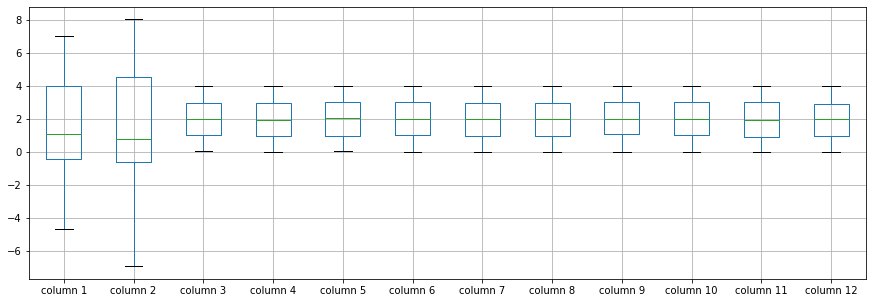

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.511996
column 2     1.305874
column 3     1.987869
column 4     1.938585
column 5     1.981577
column 6     2.011880
column 7     1.966388
column 8     1.987696
column 9     1.984376
column 10    1.991731
column 11    1.954596
column 12    1.968689
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,-0.420659,-0.031325,0.001474,0.043685,0.037740,-0.017811,0.030086,0.019342,0.006491,0.026210,0.028334
column 2,-0.420659,1.000000,-0.010396,-0.017776,-0.032682,-0.020771,0.034706,0.007596,-0.011360,-0.048374,-0.074511,0.026180
column 3,-0.031325,-0.010396,1.000000,-0.039508,0.083064,0.005697,0.012440,-0.023032,0.003825,0.001084,-0.033300,0.021175
column 4,0.001474,-0.017776,-0.039508,1.000000,-0.001403,-0.027072,0.022687,0.038191,-0.047369,0.024359,0.039563,-0.021785
column 5,0.043685,-0.032682,0.083064,-0.001403,1.000000,0.049436,0.020538,0.020259,-0.028918,-0.024565,0.020098,-0.017546
column 6,0.037740,-0.020771,0.005697,-0.027072,0.049436,1.000000,-0.073385,0.029357,0.016818,0.018136,-0.029343,0.000611
column 7,-0.017811,0.034706,0.012440,0.022687,0.020538,-0.073385,1.000000,-0.059453,0.002828,-0.043575,-0.012456,-0.032476
column 8,0.030086,0.007596,-0.023032,0.038191,0.020259,0.029357,-0.059453,1.000000,-0.056268,-0.041268,0.006412,-0.057989
column 9,0.019342,-0.011360,0.003825,-0.047369,-0.028918,0.016818,0.002828,-0.056268,1.000000,0.031933,-0.016713,-0.001053
column 10,0.006491,-0.048374,0.001084,0.024359,-0.024565,0.018136,-0.043575,-0.041268,0.031933,1.000000,-0.094949,0.043067


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+40,12+40+40,12+40+40+40,12+40+40+40+40,12+40+40+40,12+40+40,12+40,12], vae_layer = False, seed = 100)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 28.08447452545166
Epoch: 1 , loss: 27.89500785827637
Epoch: 2 , loss: 27.541104583740236
Epoch: 3 , loss: 25.895731735229493
Epoch: 4 , loss: 22.649367446899415
Epoch: 5 , loss: 21.817617530822755
Epoch: 6 , loss: 21.37524600982666
Epoch: 7 , loss: 20.8873917388916
Epoch: 8 , loss: 20.66273265838623
Epoch: 9 , loss: 20.146993675231933
Epoch: 10 , loss: 20.094162521362303
Epoch: 11 , loss: 19.89605442047119
Epoch: 12 , loss: 19.83010597229004
Epoch: 13 , loss: 19.73179775238037
Epoch: 14 , loss: 19.44944091796875
Epoch: 15 , loss: 19.14663200378418
Epoch: 16 , loss: 19.369520111083986
Epoch: 17 , loss: 19.31412296295166
Epoch: 18 , loss: 19.084772338867186
Epoch: 19 , loss: 19.11961212158203
Epoch: 20 , loss: 19.055346183776855
Epoch: 21 , loss: 18.89690975189209
Epoch: 22 , loss: 19.042514190673828
Epoch: 23 , loss: 19.155033798217772
Epoch: 24 , loss: 19.007465133666994
Epoch: 25 , loss: 18.8391958236

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(800, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.463080
column 2     0.042845
column 3     3.034900
column 4     0.379700
column 5     2.475300
column 6     2.162000
column 7     1.670000
column 8     0.755510
column 9     2.032100
column 10    3.847400
column 11    0.230250
column 12    0.359250
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\4-gauss.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,0.0,0.000000,0.0,-2.001481,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.115700
3,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.989299
796,0.0,0.000000,0.0,0.091479,0.0,0.0,0.0,0.0,0.0,0.0,-1.026848,0.000000
797,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
798,0.0,5.572655,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(42.37805716651072, 248.22200824735242)

In [17]:
NRMS=numerator/denominator
NRMS


0.17072642939976992

In [18]:
new_df.iloc[66,:]

column 1     0.207620
column 2    -0.550520
column 3     2.339900
column 4     1.885202
column 5     1.401300
column 6     2.765800
column 7     1.304100
column 8     1.249300
column 9     1.059400
column 10    1.284300
column 11    1.863223
column 12    0.575240
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.161340,0.067351,3.533700,0.469590,0.67908,3.43440,2.79240,2.77630,1.69910,3.815600,1.746400
1,-0.098505,-0.178570,2.062800,0.920119,0.424720,1.17850,1.68020,1.38880,3.21670,2.92360,0.772910,0.641450
2,-0.169460,0.501530,2.470900,3.065000,1.567600,1.48240,0.92160,2.64240,1.51870,2.53180,2.432800,2.992500
3,-0.136050,0.472790,0.588090,1.956300,2.787000,2.59570,2.89330,1.53750,0.99942,3.65930,0.618250,3.265800
4,0.098830,0.234180,0.429700,1.631200,3.554100,2.27110,0.37425,2.17860,1.31400,1.06320,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.686700,1.576000,0.556120,0.070769,2.07470,0.80304,3.22290,3.49330,1.32550,3.231100,0.994686
796,3.466600,-4.034600,3.100400,1.437579,1.377300,2.28870,0.39613,2.39610,2.46350,1.66750,1.434852,1.226700
797,3.344800,-2.384300,2.031000,2.264600,3.341200,1.53700,1.22560,0.74027,2.49540,1.34330,1.622500,1.585300
798,3.441400,0.356355,1.577000,1.844000,1.098700,3.42430,0.81081,3.72700,1.18790,0.95112,1.884500,1.143700


In [20]:
imputations[-1].to_excel("4-gauss_C_5(imp).xlsx", index=False, header=False)